# Linear Regression TCS Stock Price Prediction

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv("C:\\Users\\saipr\\Downloads\\TCS1.csv")

In [5]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-27,122.800003,122.800003,119.820000,120.332497,88.088272,30646000.0
1,2004-08-30,121.237503,123.750000,120.625000,123.345001,90.293549,24465208.0
2,2004-08-31,123.312500,123.750000,122.000000,123.512497,90.416122,21194656.0
3,2004-09-01,123.750000,124.375000,122.949997,123.487503,90.397820,19935544.0
4,2004-09-02,123.737503,125.574997,123.250000,124.207497,90.924896,21356352.0
...,...,...,...,...,...,...,...
4489,2022-10-18,3150.000000,3155.350098,3128.550049,3144.699951,3144.699951,1793722.0
4490,2022-10-19,3159.000000,3159.000000,3112.000000,3121.850098,3121.850098,1194289.0
4491,2022-10-20,3105.000000,3160.000000,3105.000000,3157.300049,3157.300049,1587601.0
4492,2022-10-21,3157.800049,3160.399902,3127.000000,3137.399902,3137.399902,1021913.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4494 entries, 0 to 4493
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4494 non-null   object 
 1   Open       4486 non-null   float64
 2   High       4486 non-null   float64
 3   Low        4486 non-null   float64
 4   Close      4486 non-null   float64
 5   Adj Close  4486 non-null   float64
 6   Volume     4486 non-null   float64
dtypes: float64(6), object(1)
memory usage: 245.9+ KB


In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4.486000e+03
mean,1146.182768,1158.538059,1132.825428,1145.521462,1049.456965,3.620596e+06
std,994.070086,1003.010607,984.043404,993.346465,992.062558,3.162368e+06
min,112.000000,116.112503,103.837502,111.550003,86.565590,0.000000e+00
25%,290.693748,295.300010,285.931259,290.275009,219.902748,1.942489e+06
50%,977.450012,995.000000,970.250000,981.337524,820.627839,2.804749e+06
75%,1564.774963,1597.287476,1548.662537,1576.781219,1443.631561,4.297410e+06
max,4033.949951,4043.000000,3980.000000,4019.149902,3964.502686,8.806715e+07


In [8]:
df.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4489,False,False,False,False,False,False,False
4490,False,False,False,False,False,False,False
4491,False,False,False,False,False,False,False
4492,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

Date         0
Open         8
High         8
Low          8
Close        8
Adj Close    8
Volume       8
dtype: int64

In [10]:
#Removing rows that containg null values
df=df.dropna()

In [11]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-27,122.800003,122.800003,119.820000,120.332497,88.088272,30646000.0
1,2004-08-30,121.237503,123.750000,120.625000,123.345001,90.293549,24465208.0
2,2004-08-31,123.312500,123.750000,122.000000,123.512497,90.416122,21194656.0
3,2004-09-01,123.750000,124.375000,122.949997,123.487503,90.397820,19935544.0
4,2004-09-02,123.737503,125.574997,123.250000,124.207497,90.924896,21356352.0
...,...,...,...,...,...,...,...
4489,2022-10-18,3150.000000,3155.350098,3128.550049,3144.699951,3144.699951,1793722.0
4490,2022-10-19,3159.000000,3159.000000,3112.000000,3121.850098,3121.850098,1194289.0
4491,2022-10-20,3105.000000,3160.000000,3105.000000,3157.300049,3157.300049,1587601.0
4492,2022-10-21,3157.800049,3160.399902,3127.000000,3137.399902,3137.399902,1021913.0


# Training and Testing Data

In [12]:
X=df[['Open','High','Low','Volume']]
y=df['Close']

In [13]:
#split the data into training and testing sets
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# Train the model

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lm=LinearRegression()

In [17]:
lm.fit(X_train,y_train)

LinearRegression()

# Predicting test data

In [18]:
prediction = lm.predict(X_test)



In [19]:
prediction

array([ 171.60146208, 2478.81460548,  170.23080237, ...,  130.07417832,
        313.27883355, 1725.2343437 ])

# Evaluating the Model

In [20]:
from sklearn import metrics

In [21]:
print('MAE:',metrics.mean_absolute_error(y_test,prediction))

MAE: 4.969557611188009


In [22]:
print('MSE:',metrics.mean_squared_error(y_test,prediction))

MSE: 68.24591164050094


# Residuals

Text(0, 0.5, 'X Test(Predicted Values)')

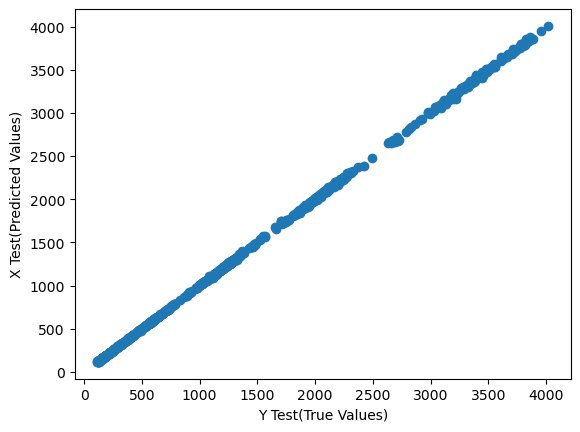

In [23]:
plt.scatter(y_test,prediction)
plt.xlabel('Y Test(True Values)')
plt.ylabel('X Test(Predicted Values)')

C:\Users\saipr\AppData\Local\Temp\ipykernel_9736\1219987323.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-prediction),bins=50);


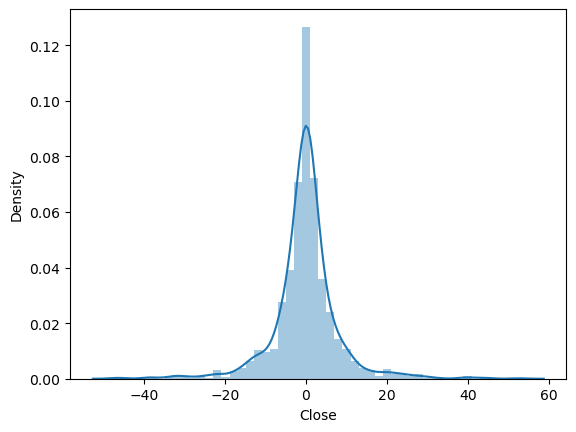

In [24]:
sns.distplot((y_test-prediction),bins=50);